In [1]:
# # ARIMA considers the data to be linear
# # 

# # if the data is not normally disctirbuted then integrated arima will not work
# # y = mx + b
# arima parameters p,d,q,m
# m = 12 for months
# weekly m = 52, daily m = 365
# m = 4 season

# regressor first for predicting

# in more complicated scenariou
# LSTM for time series
# train and test : split 20: 80 and not random.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = yf.download('META', start='2020-01-01', end='2023-12-07')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data = data['Adj Close']

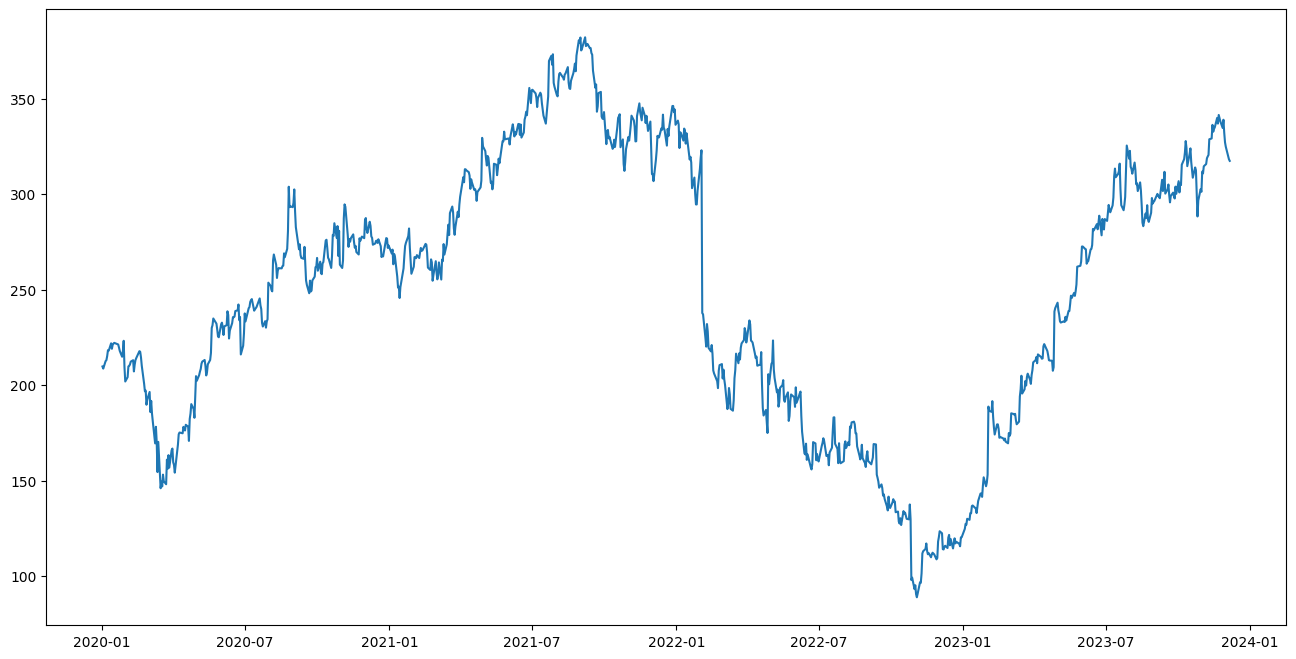

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data)

In [6]:
data.describe()

count    990.000000
mean     247.838475
std       70.531887
min       88.910004
25%      191.827496
50%      256.830002
75%      306.834999
max      382.179993
Name: Adj Close, dtype: float64

In [7]:
import matplotlib.pyplot as plt

(array([ 36.,  57., 100., 107., 136.,  95., 144., 137., 132.,  46.]),
 array([ 88.91000366, 118.23700256, 147.56400146, 176.89100037,
        206.21799927, 235.54499817, 264.87199707, 294.19899597,
        323.52599487, 352.85299377, 382.17999268]),
 <BarContainer object of 10 artists>)

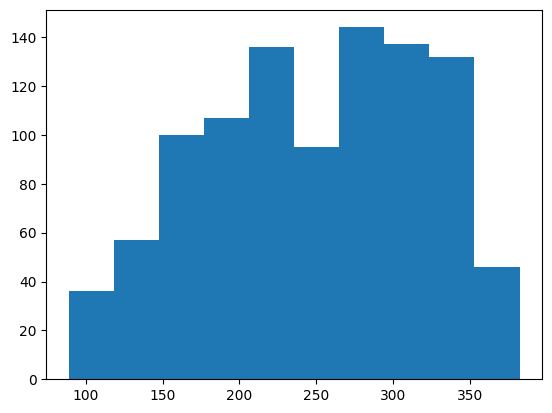

In [8]:
plt.hist(data)

In [9]:
data = data.to_frame()

In [10]:
data['7_dayMA'] = data['Adj Close'].rolling(window=7).mean()

<Axes: xlabel='Date'>

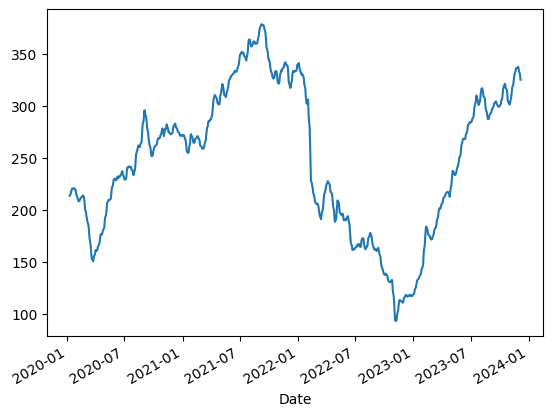

In [11]:
data['7_dayMA'].plot()

In [12]:
data['30_dayMA'] = data['Adj Close'].rolling(window=30).mean()

<Axes: xlabel='Date'>

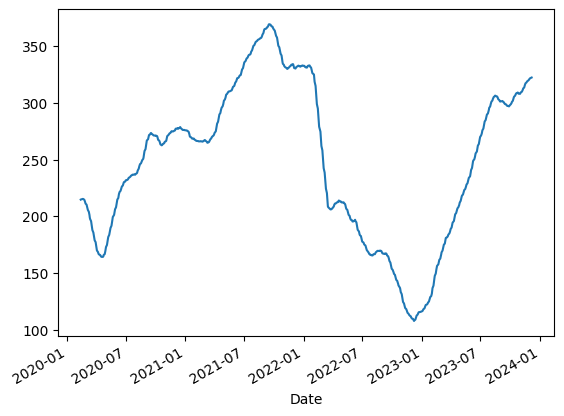

In [13]:
data['30_dayMA'].plot()

In [14]:
data.reset_index(inplace=True)

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data.set_index('Date', inplace=True)

In [17]:
seasonal_df = data.pivot_table(values='Adj Close', aggfunc='mean', index=data.index.month, columns=data.index.year)

<Axes: xlabel='Date'>

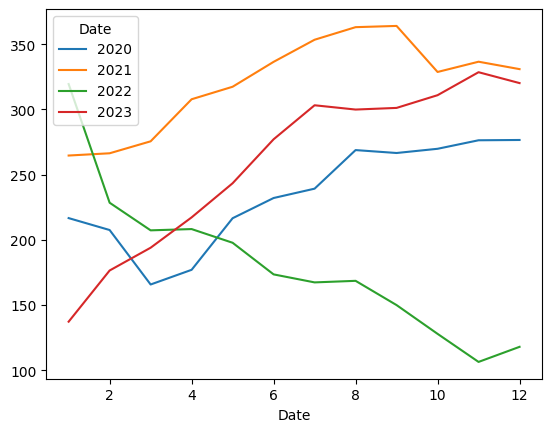

In [18]:
seasonal_df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 30)'>

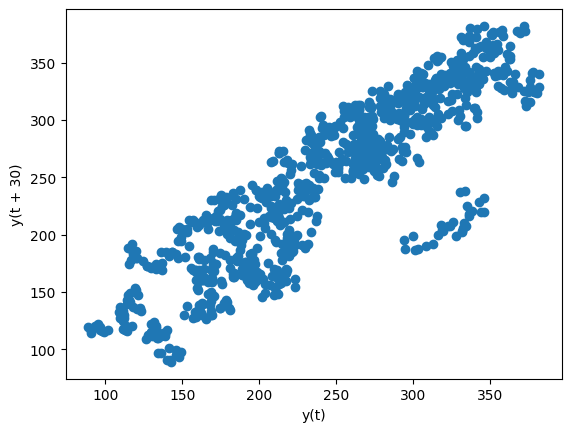

In [19]:
pd.plotting.lag_plot(data['Adj Close'], lag=30)

In [20]:
data['7_day_lag'] = data['Adj Close'].shift(7)

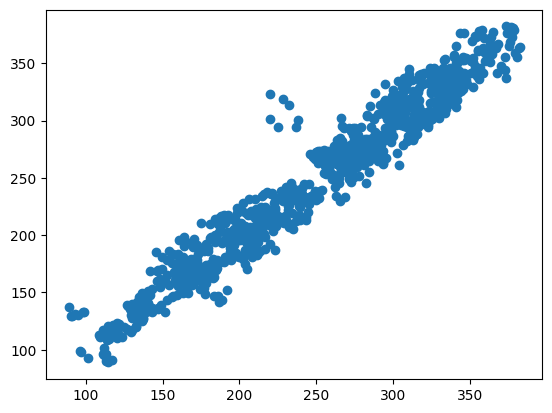

In [21]:
plt.scatter(data['Adj Close'], data['7_day_lag'])

<Axes: xlabel='y(t)', ylabel='y(t + 90)'>

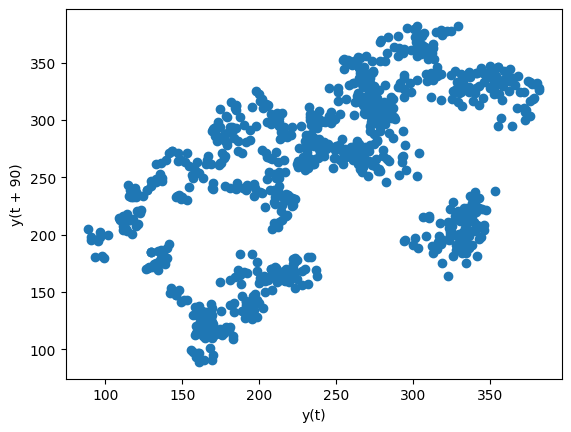

In [22]:
pd.plotting.lag_plot(data['Adj Close'], lag=90)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

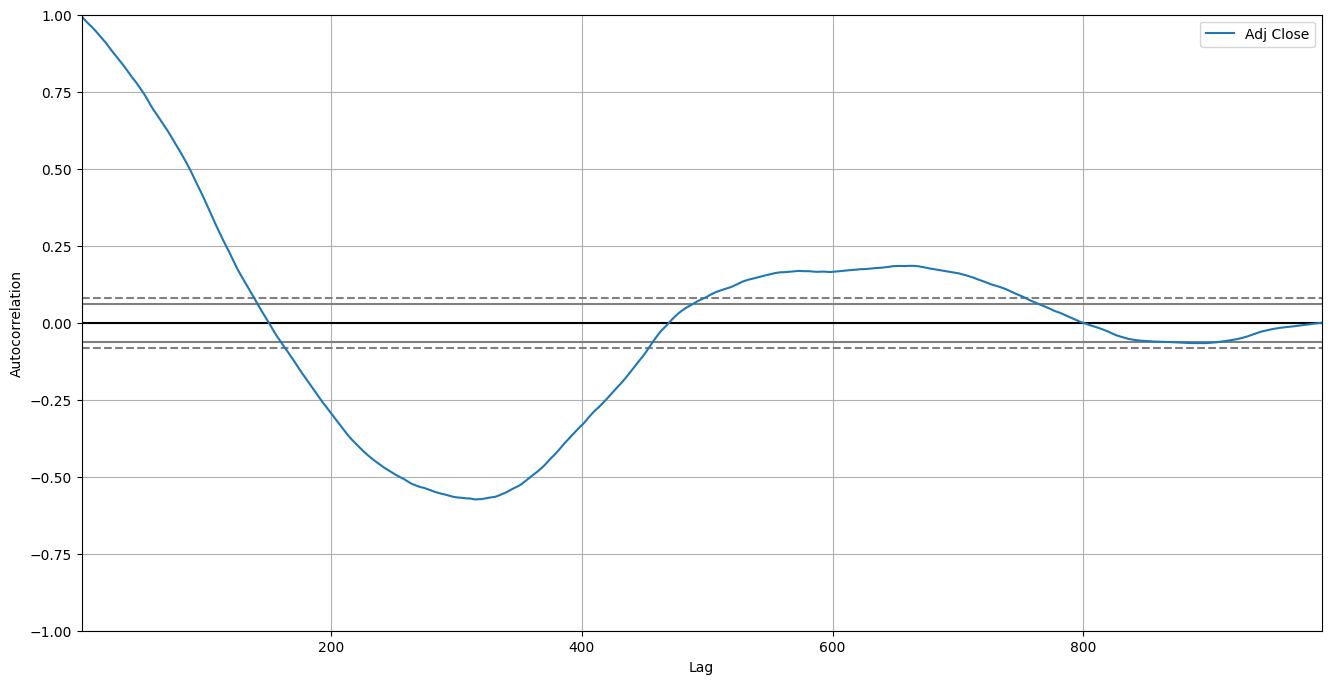

In [23]:
plt.figure(figsize=(16,8))
pd.plotting.autocorrelation_plot(data['Adj Close'], label='Adj Close')

use this grapgh for identifying the number of lags required for the second plot below

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
decomposed = seasonal_decompose(data['Adj Close'], model='additive', period=365)

<Figure size 1000x800 with 0 Axes>

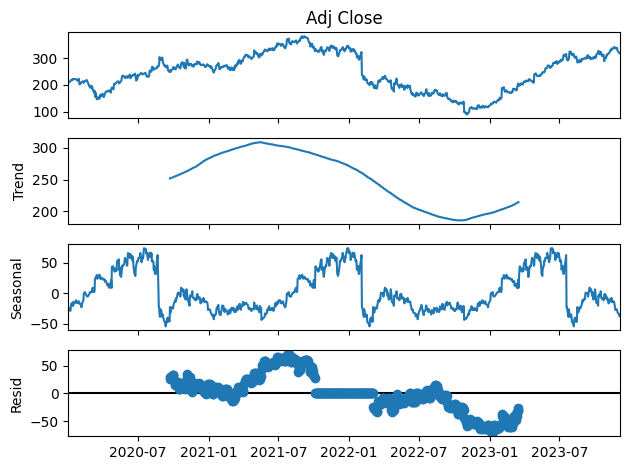

In [26]:
plt.figure(figsize=(10,8))
decomposed.plot()
plt.show()

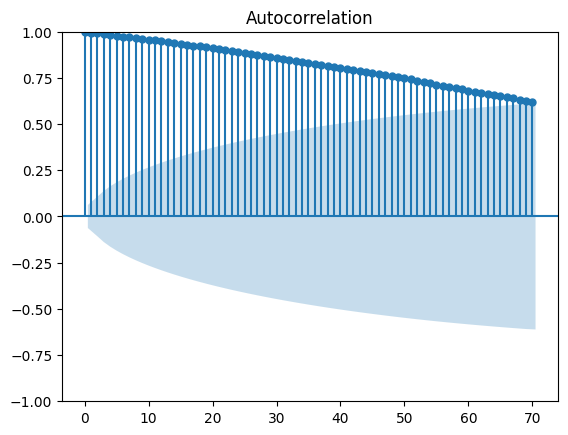

In [27]:
plot_acf(data['Adj Close'], lags = 70)
plt.show()

In [28]:
from pmdarima.arima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
auto_arima(data['Adj Close'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  990
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3274.739
Date:                Sat, 09 Dec 2023   AIC                           6551.477
Time:                        15:35:48   BIC                           6556.374
Sample:                             0   HQIC                          6553.339
                                - 990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        44.0129      0.502     87.719      0.000      43.029      44.996
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):             35955.39
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.99
Prob(H) (two-sided):                  0.08   Kurtosis:                        32.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
arima_model = auto_arima(data['Adj Close']
                         , start_p=1
                         , start_q=1
                         , start_Q=0
                         , max_Q=20
                         , max_p=20
                         , max_q=20
                         , m=12
                         , d=None
                         , start_P=0
                         , D=0
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6554.417, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6553.211, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6553.556, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6553.624, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6551.477, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6553.324, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6553.328, Time=0.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6555.167, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6553.499, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6553.569, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.535 seconds


In [31]:
# find the best value for ARIMA model
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

p=d=q=range (0,5)
pdq = list(itertools.product(p,d,q))
df = []
df = pd.DataFrame(df)

for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(data['Adj Close'],order=param)
        model_arima_fit = model_arima.fit()
        df.append(param,model_arima_fit.aic)
    except:
        continue
df

""


(0, 0)

In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  990
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3274.739
Date:                Sat, 09 Dec 2023   AIC                           6551.477
Time:                        15:23:11   BIC                           6556.374
Sample:                             0   HQIC                          6553.339
                                - 990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        44.0129      0.502     87.719      0.000      43.029      44.996
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):             35955.39
Prob(Q):                              0.19   Pr

In [ ]:
arima_model.predict(n_periods=10)

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


990    317.450012
991    317.450012
992    317.450012
993    317.450012
994    317.450012
995    317.450012
996    317.450012
997    317.450012
998    317.450012
999    317.450012
dtype: float64

In [ ]:
data['30_day_lag'] = data['Adj Close'].shift(30)

In [ ]:
data = data[['Adj Close','7_day_lag','30_day_lag']].dropna()

In [ ]:
X = data[['7_day_lag','30_day_lag']]
y= data['Adj Close']

In [ ]:
len(X)

960

In [ ]:
from sklearn.model_selection import train_test_split
X_train = X.iloc[:800]
X_test = X.iloc[800:]
y_train = y.iloc[:800]
y_test = y.iloc[800:]

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred))

18.776855622672862

only mulitple choice 20 -25
veru similar 
most of the content is similar.
model structure, theory.


bonus questions from class presnetations.


from aditiona readings.

some will be theoritical and some is applicaiton based.
mostly secondhalf.



5 to 6 out of 10.

what was the model recommended and what was their problem statement ?

what model is sleected . 

what was the business applicaiton of the material.


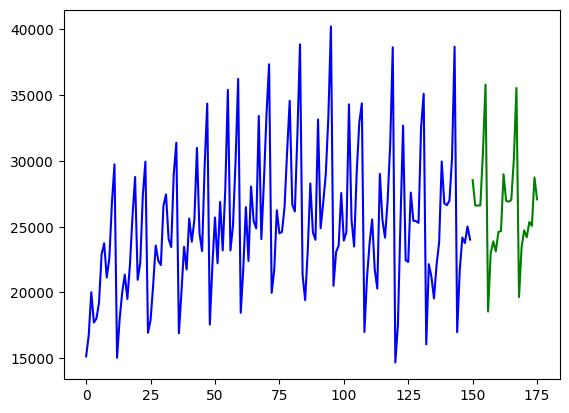

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()